Numerisk prosjekt | Bølgefysikk og Fluidmekanikk | TFY4163

Henrik Grønlund, henrisg@stud.ntnu.no

Sist endret:  28.03.2023


In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Konstanter

l = 1.0 #[m] snorlengde
g = 9.8 #[m/s^2] tyngdeakselerasjon 
theta_0 = 0.2 #[rad] initiell vinkel mhp vertikalen
omega_0 = 0.0 #[rad * s^-1] initiell vinkelhastighet
q = 1.0 # [s^-1] Friksjonsparameter
omega_D = 3.13 #[s*-1] Drivkraftens vinkelfrekvens
Drivkraft = 0.2 #[N] F_D/ml 
m = 1 #[kg] masse til pendel

In [67]:
t_0 = 0
t_end = 20
dt = 0.01

## Oppgave 1)

For å løse:
$$\frac{d^2 \theta}{dt^2} = -\frac{g}{l}\theta - q\frac{d\theta}{dt} + \frac{F_D}{ml}\sin{\omega_d t}$$
Deles den andreordens diffrensiallikningen inn i to første ordens. 

$$\frac{d\theta}{dt} = \omega$$
$$\alpha = \frac{d \omega}{dt} = - \frac{g}{l} \theta - q \omega + \frac{F_D}{ml}\sin{\omega_d t}$$

In [68]:
#Regner ut verdier av alfa
def alfa(t, theta , omega, w_d , q, F_D):
    """Regner ut verider av alfa"""
    alfa = F_D*np.sin(w_d*t) - q * omega - (g/l)*theta
    return alfa

In [69]:
def fjerdeOrdensRungeKnutta(alfa , theta_0, omega_0 , w_d, q, F_D , t_start, t_end , dt):
     """Fjerde ordens Runge-Knutta, med innsatt alfa, theta_0 , omega_0 , start tid, slutt tid, og tidssteg"""
     t = np.arange(t_start,t_end,dt) # tid
     theta = np.zeros(len(t)) #vinkelutslaget
     w = np.zeros(len(t)) #vinkelhastighet 

     theta[0] = theta_0
     w[0] = omega_0

     for n in range(len(t)-1):
          k_1_1 = dt * (w[n])
          k_1_2 = dt * alfa(t[n], theta[n], w[n] , w_d , q , F_D)
          k_2_1 = dt * (w[n] + 0.5*k_1_2)
          k_2_2 = dt * alfa(t[n] + 0.5*dt, theta[n] + 0.5*k_1_1, w[n] + 0.5*k_1_2 , w_d, q, F_D)
          k_3_1 = dt * (w[n] + 0.5*k_2_2)
          k_3_2 = dt * alfa(t[n] + 0.5*dt, theta[n] + 0.5*k_2_1, w[n] + 0.5*k_2_2 , w_d , q, F_D)
          k_4_1 = dt * (w[n] + k_3_2)
          k_4_2 = dt * alfa(t[n] + dt, theta[n] + k_3_1, w[n] + k_3_2 , w_d , q, F_D)
          

          t[n+1] = t[n] + dt
          theta[n+1] = theta[n] + (1/6)*(k_1_1 + 2*k_2_1 + 2*k_3_1 + k_4_1)
          w[n+1] = w[n] + (1/6)*(k_1_2 + 2*k_2_2 + 2*k_3_2 + k_4_2)

     return t , theta , w

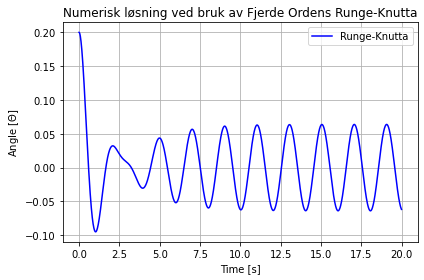

In [70]:
t_RK, theta_RK, w_RK= fjerdeOrdensRungeKnutta(alfa,theta_0, omega_0, omega_D, q, Drivkraft , t_0 , t_end , dt)

plt.plot(t_RK,theta_RK, color="blue" , label = "Runge-Knutta")
tittel = "1) fjerdeOrdensRungeKnutta.pdf"



plt.legend()
plt.title("Numerisk løsning ved bruk av Fjerde Ordens Runge-Knutta")
plt.xlabel("Time [s]")
plt.ylabel("Angle [$\Theta$]")
plt.grid(True)
plt.tight_layout()
#plt.savefig(tittel)
plt.show()

## Oppgave 2)

In [71]:
def eulerCromer(alfa , theta_0, omega_0, w_d , q, F_D , t_start, t_end , dt):
    """Euler Cromer løsning for ODE"""
    t = np.arange(t_start,t_end,dt) # tid
    theta = np.zeros(len(t)) #vinkelutslaget
    w = np.zeros(len(t)) #vinkelhastighet 

    theta[0] = theta_0
    w[0] = omega_0

    for n in range(len(t)-1):
         #Ny tid
         t[n+1] = t[n] + dt 
        #Ny vinkelhastighet
         w[n+1] = w[n] + dt * alfa(t[n], theta[n], w[n] , w_d , q , F_D)
        #Ny vinkel
         theta[n+1] = theta[n] + dt*w[n+1]

    return t , theta , w



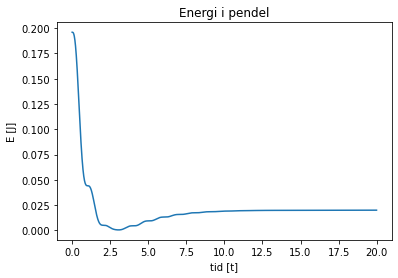

In [72]:
def EM(theta_arr , omega_arr):
    """Beregner den mekaniske energien til bevegelsen"""

    U = 0.5 * m * pow(l,2) * pow(omega_arr , 2)
    K = 0.5 * m * g *l*pow(theta_arr,2)

    return(U+K)


t_a , theta_a , omega_a = fjerdeOrdensRungeKnutta(alfa , theta_0 , omega_0 ,omega_D, q, Drivkraft, t_0 , t_end , dt)
e_Arr = EM(theta_a , omega_a)

plt.plot(t_a , e_Arr)
plt.title("Energi i pendel")
plt.xlabel("tid [t]")
plt.ylabel("E [J]")
plt.show()


In [73]:
def konvergensTest(metode , alfa , w_d, q , F_D, start_dt , end_dt , delta):
    """Beregner konvergens for forskjellige tidssteg (dt), basert på den mekaniske energien til det minste tidssteget"""
    """Returnerer liste med tidssteg og med avvik i siste mekansike energi"""
    t1 , theta1 , omega1 = metode(alfa , theta_0 , omega_0, w_d, q ,F_D, t_0 , t_end , start_dt)
    E1 = EM(theta1 , omega1)
    E0 = E1[-1] # Verdien som de andre blir sammeliknet med.

    dt_arr = np.arange(start_dt , end_dt , delta)
    dE_arr = np.zeros(len(dt_arr))

    for index ,elem in enumerate(dt_arr):
        """Ser på hvert element i dt_arr og husker indeksen"""
        t_arr , theta_arr , omega_arr = metode(alfa , theta_0 , omega_0, w_d, q ,F_D, t_0 , t_end , elem)
        E_arr = EM(theta_arr , omega_arr)
        dE_arr[index] = np.abs(E_arr[-1] - E0)

    return dt_arr , dE_arr


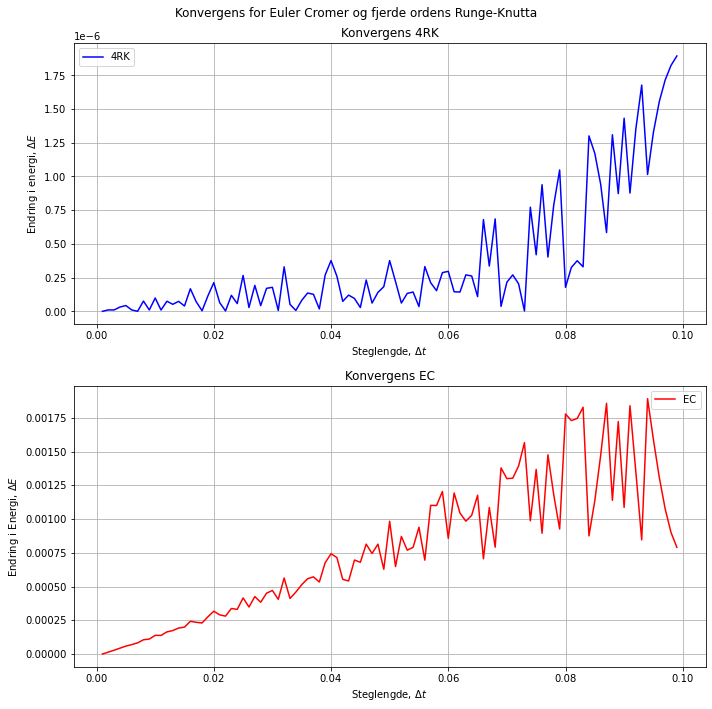

In [74]:
# Kjører så plot funksjoner for testen
#Lager arrays for Runge Knutta
dt_arr1 , dE_arr1 = konvergensTest(fjerdeOrdensRungeKnutta ,alfa, omega_D, q, Drivkraft ,0.001 , 0.1 ,0.001)
#lager arrays for Euler Cromer
#dt_arr2 , dE_arr2 = konvergensTest(eulerCromer , alfa ,start_dt= 0.001 , end_dt= 0.1 ,delta= 0.001)
dt_2 , dE_2 = konvergensTest(eulerCromer , alfa, omega_D, q, Drivkraft , 0.001 , 0.1 , 0.001)


fig , ax = plt.subplots(2 , figsize = (10 ,10))

ax[0].plot(dt_arr1,dE_arr1, color = "blue" , label = "4RK")
ax[1].plot(dt_2,dE_2, color = "red" , label = "EC")

fig.suptitle("Konvergens for Euler Cromer og fjerde ordens Runge-Knutta")

ax[0].set_xlabel("Steglengde, $\Delta t$")
ax[0].set_ylabel("Endring i energi, $\Delta E$ ")
ax[0].set_title("Konvergens 4RK")
ax[0].grid()
ax[0].legend()

ax[1].set_xlabel("Steglengde, $\Delta t$")
ax[1].set_ylabel("Endring i Energi, $\Delta E$ ")
ax[1].set_title("Konvergens EC")
ax[1].grid()
ax[1].legend()

#plt.savefig("2) konvergens.pdf")
plt.tight_layout()
plt.show()

    Forklaring av grafer over.

For å bedømme konvergens av metodene, blir det at den mekaniske energien stabiliserer seg etter en kort stund. 

Metoden (Takk til T.Xenakis, og V.Falch) basserer seg på at den numeriske løsningen med minst tidsintervall er den mest nøyaktige. Siden vi skal se på tidsintervaller fra a til b, der a<b, vil løsningen med a være mest nøyaktig. Løsningen med a blir derfor brukt som en fasit, som de andre tidsintervallene skal sammenliknes med. Videre blir det bare sett på det siste elementet i listen med Mekanisk Energi, der vi lar siste element i løsningen med a være $E_0$ som de andre siste elementene blir sammenliknet med. 

Fra grafene kan vi se at feilen i 4RK er relativt stabil fram til $\Delta t$ = 0.06 og at feilen i EC øker relativt lineært fram til $\Delta t$ = 0.03. For å få stabile resultater burde $\Delta t$ være mindre en 0.03. Verdien benyttet i oppgave 1, $\Delta t$ = 0.01 er derfor et tilstrekkelig tidsintervall.

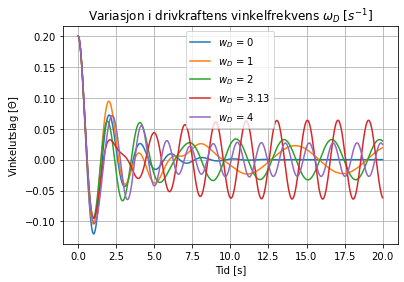

In [75]:
# Oppgave 3

omega_D_arr = [0 ,1 , 2, omega_D,4]

for elem in omega_D_arr:
    t,theta,omega = fjerdeOrdensRungeKnutta(alfa , theta_0 , omega_0, elem, q, Drivkraft , t_0 , t_end , dt)
    label = f"$w_D$ = {str(elem)}"
    plt.plot(t, theta , label = label)

plt.title("Variasjon i drivkraftens vinkelfrekvens $\omega_D$ [$s^{-1}$]")
plt.xlabel("Tid [s]")
plt.ylabel("Vinkelutslag [$\Theta$]")
plt.legend()
plt.grid()
#plt.savefig("3) Variasjon i w_D.pdf")
plt.show()

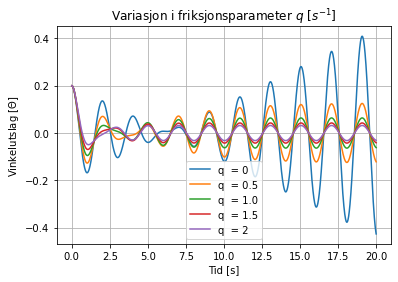

In [76]:
# Oppgave 4

q_arr = [0 ,0.5 , q, 1.5, 2]

for elem in q_arr:
    t,theta,omega = fjerdeOrdensRungeKnutta(alfa , theta_0 , omega_0,omega_D , elem, Drivkraft , t_0 , t_end , dt)
    label = f"q  = {str(elem)}"
    plt.plot(t, theta , label = label)

plt.title("Variasjon i friksjonsparameter $q$ [$s^{-1}$]")
plt.xlabel("Tid [s]")
plt.ylabel("Vinkelutslag [$\Theta$]")
plt.legend()
plt.grid()
#plt.savefig("4) Variasjon i q.pdf")
plt.show()


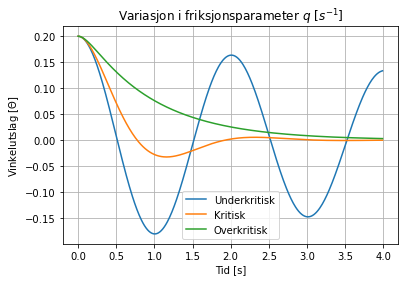

In [77]:
#Oppg 5

Drivkraft = 0 #setter frivkraft til 0
t_stop = 4 # ny sluttid

q_list = [0.2 , omega_D , 10]

labels = ["Underkritisk" , "Kritisk" , "Overkritisk"]

for index, elem in enumerate(q_list):
    t,theta,omega = fjerdeOrdensRungeKnutta(alfa , theta_0 , omega_0, omega_D , elem, Drivkraft , t_0 , t_stop , dt)
    label = labels[index]
    plt.plot(t, theta , label = label)

plt.title("Variasjon i friksjonsparameter $q$ [$s^{-1}$]")
plt.xlabel("Tid [s]")
plt.ylabel("Vinkelutslag [$\Theta$]")
plt.legend()
plt.grid()
#plt.savefig("5) over,under og kritisk dempning.pdf")
plt.show()

#setter tilbake drivkraften
Drivkraft = 0.2
    

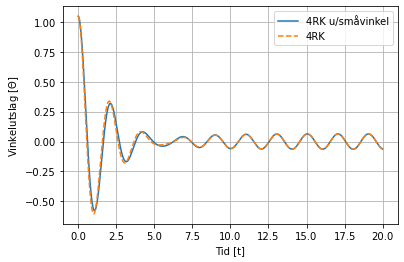

In [78]:
# Oppgave 6
# a)
def alfa2(t,theta,omega,omega_D,q, F_D):
    """Difflikning for pendel, uten småvinkeltilnærming"""
    a2 = F_D*np.sin(omega_D*t)-q*omega - (g/l)*np.sin(theta)
    return a2

theta_0 = np.radians(60)

t,theta,omega = fjerdeOrdensRungeKnutta(alfa2 , theta_0 , omega_0, omega_D , q, Drivkraft , t_0 , t_end , dt)
t1,theta1,omega1 = fjerdeOrdensRungeKnutta(alfa , theta_0 , omega_0, omega_D , q, Drivkraft , t_0 , t_end , dt)
plt.plot(t,theta, label = "4RK u/småvinkel")
plt.plot(t1,theta1, "--" , label = "4RK")
plt.grid()
plt.xlabel("Tid [t]")
plt.ylabel("Vinkelutslag [$\Theta$]")
plt.legend()
#plt.savefig("6) a) 4RK uten småvinkeltilnærming.pdf")
plt.show()

In [79]:
#Oppgve 6
# b)
# bestemmer at: g,l,m,dt,t_0,t_end ikke skal endres på
def plott(theta_0 , omega_0 , q , w_D , F_D):
    """Ploter 4RK med tilhørende variabler"""
    t, theta, omega = fjerdeOrdensRungeKnutta(alfa2 , theta_0 , omega_0 ,w_D , q , F_D, t_0 , t_end, dt)
    plt.plot(t, theta)
    plt.title("Kaotisk pendel")
    plt.xlabel("Tid [t]")
    plt.ylabel("Vinkelutslag [$\Theta$]")
    plt.grid()
    #plt.savefig("6) b) kaotisk pendel.pdf")
    plt.show()
    return

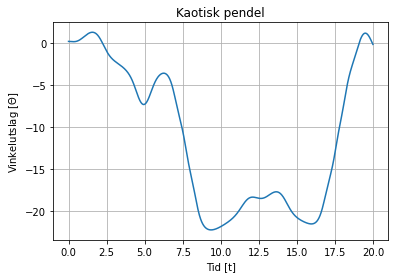

In [80]:
plott(0.2 , 0 , 0.2 , np.pi/2 , 7)